In [1102]:
import numpy as np
import pandas as pd
import os,sys,inspect
import scipy.stats as stats
import scipy.optimize as opt
import econtools 
import econtools.metrics as mt
import statsmodels.discrete.discrete_model as sm
import matplotlib.pyplot as plt
import itertools as it
import copy


from entry import entry_data
from entry import entry_estimation

import importlib
importlib.reload(entry_data)
importlib.reload(entry_estimation)

<module 'entry.entry_estimation' from '/Users/jingyuanwang/GitHub/NU450_HW/450-1-Final/entry/entry_estimation.py'>

In [1103]:
# ------------------------------------------------------------------------
# NOTE
# ------------------------------------------------------------------------
# Purpose: Final Q3 
# 
# 
#
# ------------------------------------------------------------------------

# working directory

In [1104]:
rootpath = '/Users/jingyuanwang/Dropbox/Course/ECON/IO/NU450/NU450_HW/450-1-Final'
datapath = rootpath + '/' + 'data'
resultpath = rootpath + '/' + 'results'

# Parameters

In [1105]:
theta = [1,3,1.5,0.3,0.1]

# (a)

In [1106]:
n = 100
X_m = np.linspace(0,2.5,n)
N_m = np.ones(n)*5

In [1107]:
# save as a class
entry_model = entry_data.Entry_Model()

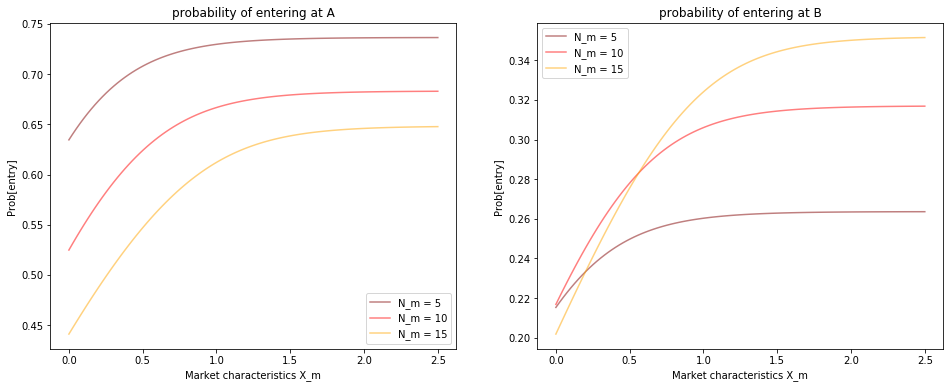

In [1108]:
entry_model.Plot_prob_of_entry(theta, X_m, figpath = resultpath, figname = 'prob_entry', save = True)

# (b)

In [1109]:
# 1. simulation
entry_model.simulate_sample(theta, 100)

In [1110]:
# 2. estimation
# (1) import data
estimation = entry_estimation.Entry_Estimation(entry_model)

In [1111]:
# (2) MLE
def print_par_and_obj(par_est):
    obj = estimation.obj_loglikelihood(par_est)
    print('loglikelihood = {}, at parameter value {}'.format(obj, par_est))
    return

print('MLE:')
# 2. try potential argmax
par_est = np.ones(5)
print_par_and_obj(par_est)

par_est = np.array([1, 4, 1,.1,0.5])
print_par_and_obj(par_est)

par_est = np.zeros(5)+0.5
print_par_and_obj(par_est)

# 2. true value
print('--true value--')
print_par_and_obj(EST_MLE.true_theta)

# 3. argmax (mannually test)
print('--argmax (mannually tested)--')
par_est = np.array([1.12, 2.61 , 1.45, 0.29, 0.08])
print_par_and_obj(par_est)

MLE:
loglikelihood = -1897.166881612757, at parameter value [1. 1. 1. 1. 1.]
loglikelihood = -2292.6564591336987, at parameter value [1.  4.  1.  0.1 0.5]
loglikelihood = -1705.6451319010753, at parameter value [0.5 0.5 0.5 0.5 0.5]
--true value--
loglikelihood = -1068.7898978601058, at parameter value [1.  3.  1.5 0.3 0.1]
--argmax (mannually tested)--
loglikelihood = -1067.3236376159145, at parameter value [1.12 2.61 1.45 0.29 0.08]


# (c)

## i. two-stage OLS

In [1065]:
res = estimation.OLS()
res.round(3)

,beta,se,p>t
beta0,-0.887,0.556,0.115
beta1,0.386,0.425,0.368
beta2,-0.045,0.131,0.734
gamma1,0.385,0.066,0.000
gamma2,-0.043,0.069,0.538
gamma2-gamma1,0.298,0.032,0.000


## ii. two-stage OLS using true probability

In [1066]:
res = estimation.OLS(true_prob=True)
res.round(3)

,beta,se,p>t
beta0,1.0,0.0,0.0
beta1,3.0,0.0,0.0
beta2,1.5,0.0,0.0
gamma1,-0.3,0.0,0.0
gamma2,-0.1,0.0,0.0
gamma2-gamma1,-0.2,0.0,0.0


## iii. two-stage OLS using 1000 observations

In [1067]:
# simulation 1000 markets
entry_model.simulate_sample(theta, 1000)
estimation = entry_estimation.Entry_Estimation(entry_model)

In [1099]:
# MLE:
# (1). try potential argmax
print('--true value--')
print_par_and_obj(EST_MLE.true_theta)

# (2). argmax (mannually test)
print('--argmax in 100 sample --')
par_est = np.array([1.12, 2.61 , 1.45, 0.29, 0.08])
print_par_and_obj(par_est)
print('--argmax in 1000 sample--')
par_est = np.array([1.04, 2.61, 1.46,  0.30, 0.08])
print_par_and_obj(par_est)

--true value--
loglikelihood = -10569.407522440188, at parameter value [1.  3.  1.5 0.3 0.1]
--argmax in 100 sample --
loglikelihood = -10566.173665086477, at parameter value [1.12 2.61 1.45 0.29 0.08]
--argmax in 1000 sample--
loglikelihood = -10562.674084982738, at parameter value [1.04 2.61 1.46 0.3  0.08]


In [1100]:
# OLS:
res = estimation.OLS()
res.round(3)

,beta,se,p>t
beta0,-2.317,0.214,0.000
beta1,0.871,0.180,0.000
beta2,-0.112,0.067,0.097
gamma1,0.580,0.031,0.000
gamma2,0.041,0.027,0.124
gamma2-gamma1,0.345,0.016,0.000


In [1101]:
res = estimation.OLS(true_prob=True)
res.round(3)

,beta,se,p>t
beta0,1.0,0.0,0.0
beta1,3.0,0.0,0.0
beta2,1.5,0.0,0.0
gamma1,-0.3,0.0,0.0
gamma2,-0.1,0.0,0.0
gamma2-gamma1,-0.2,0.0,0.0
